# Métodos de Ensamble

Este cuaderno contiene el código para la implementación de métodos de ensamble en Python.

In [3]:
# Cargar librerias para ciencia de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Preparar datos
from sklearn.model_selection import train_test_split # División train/test

# Modelos simples
from sklearn.linear_model import LinearRegression # Regresión Lineal
from sklearn.linear_model import LogisticRegression # Regresión Logística
from sklearn.tree import DecisionTreeClassifier # Arbol de clasificación
from sklearn.tree import DecisionTreeRegressor # Arbol de regresión

# Métodos de ensamble (Regresión)
from sklearn.ensemble import RandomForestRegressor # Randomforest
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting Machine
from sklearn.ensemble import AdaBoostRegressor # AdaBoost
from sklearn.ensemble import StackingRegressor # Stacking

# Métodos de ensamble (Clasificación)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Métricas (Regresión)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from yellowbrick.regressor import prediction_error


# Métricas (Clasificación)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Matriz de confusión
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Validación cruzada y ajuste de hiperparámetros
from yellowbrick.model_selection import ValidationCurve # Visualización de hiperparámetros
from sklearn.model_selection import GridSearchCV # Busqueda exahustiva

# Análisis de modelos
from yellowbrick.model_selection import feature_importances # Gráfica de variables


pd.set_option('display.max_columns', None)

In [4]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Analitica de Datos UJaveriana')

# Verificar los archivos de las carpetas
!ls

'1. Analisis Exploratorio.ipynb'        credit_card_default.csv
'2. Modelo de Regresion.ipynb'	        cupones.csv
 3_Regresion_Logistica.ipynb	        cupones.xlsx
 3.Regresion_Logistica_Solucion.ipynb   gastos_medicos.xlsx
 4.Arbole_Decision.ipynb	        graficas_analisis_presentacion.ipynb
 4.Arbole_Decision_Solucion.ipynb       incumplimiento_credito.csv
 5.Metodos_Ensamble.ipynb	        Modelos_Machine_Learning.ipynb
 5.Metodos_Ensamble_Solucion.ipynb      predicciones.xlsx
 6.SVM_KNN.ipynb		        publicidad.csv
 bank_marketing.csv		        Taller_Regresion_Lineal.ipynb


## Estimación de gastos médicos

In [6]:
gastos = pd.read_excel("gastos_medicos.xlsx")
gastos.head()

,sexo,edad,hijos,region,imc,fumador,gastos
0,mujer,19,0,suroccidente,27.900,si,16884.92
1,hombre,18,1,suroriente,33.770,no,1725.55
2,hombre,28,3,suroriente,33.000,no,4449.46
3,hombre,33,0,noroccidente,22.705,no,21984.47
4,hombre,32,0,noroccidente,28.880,no,3866.86


### División Train Test

In [7]:
# Divida variables independientes Xs y variable dependiente y
Y = gastos['gastos']
X = gastos.drop(columns=['gastos'])

# Cree las variables dummies
X = pd.get_dummies(X)

# Dividir los datos en cojunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=7)

### Modelo de Regresión Lineal

In [8]:
# Configurar modelo de regresión
reg_lin = LinearRegression()

# Entrenar modelo de regresión
reg_lin.fit(X_train, y_train)

LinearRegression()

In [9]:
# Generar predicción
y_pred_reg_lin = reg_lin.predict(X_test)

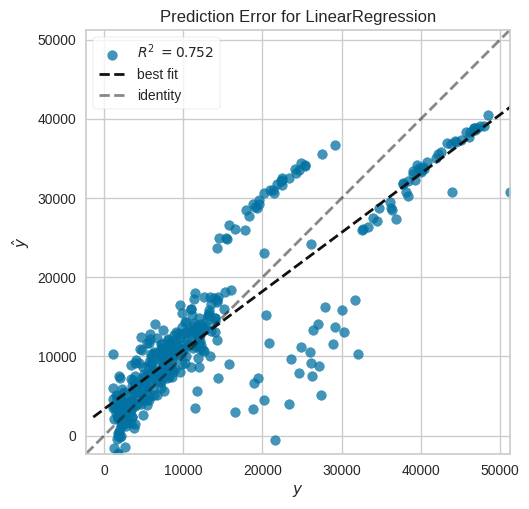

In [10]:
# Analizar predicciones vs valores reales
visualizer = prediction_error(LinearRegression(), X_train, y_train, X_test, y_test)

In [11]:
# Métricas

# MSE
mse_reg_lin = mean_squared_error(y_test, y_pred_reg_lin)

# RMSE
rmse_reg_lin = np.sqrt(mse_reg_lin)

# MAPE
mape_reg_lin = mean_absolute_percentage_error(y_test, y_pred_reg_lin)

print(f'MSE Regresión Lineal = {mse_reg_lin}')
print(f'RMSE Regresión Lineal = {rmse_reg_lin}')
print(f'MAPE Regresión Lineal = {mape_reg_lin}')

MSE Regresión Lineal = 36313026.42298709
RMSE Regresión Lineal = 6026.029075849791
MAPE Regresión Lineal = 0.45971149525957095


### Arbol de Regresión

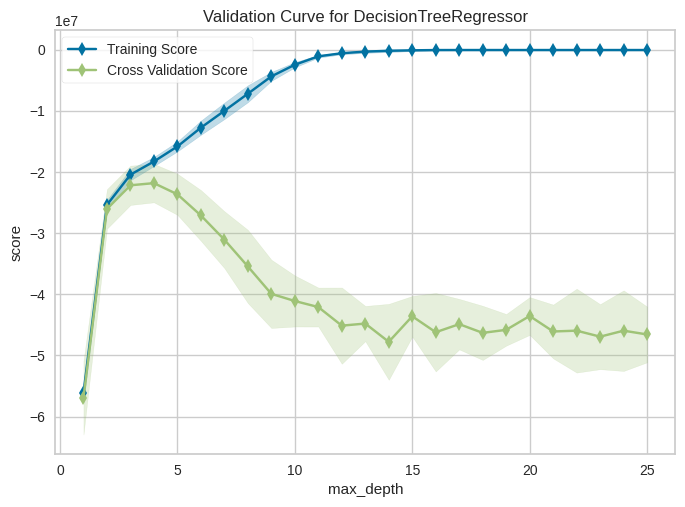

<Axes: title={'center': 'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [12]:
# Ajuste de hiperparámetros
curva_calibracion = ValidationCurve(
    DecisionTreeRegressor(),
    param_name='max_depth',
    param_range=np.arange(1,26,1),
    cv=5,
    scoring="neg_mean_squared_error")

curva_calibracion.fit(X_train, y_train)
curva_calibracion.show()

In [13]:
# Configurar modelo de regresión
dt = DecisionTreeRegressor(max_depth=4)

# Entrenar modelo de regresión
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [14]:
# Generar predicción
y_pred_dt = dt.predict(X_test)

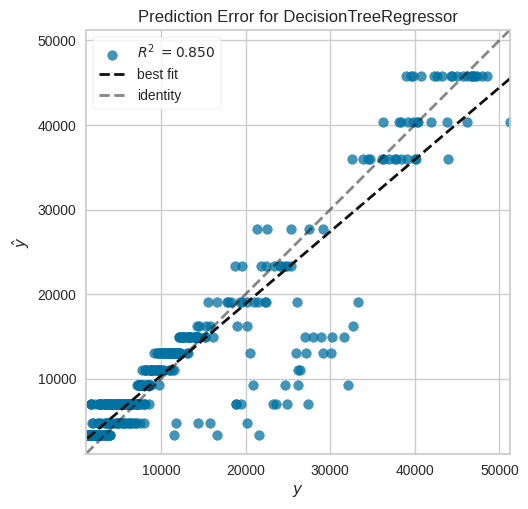

In [15]:
# Analizar predicciones vs valores reales
visualizer = prediction_error(DecisionTreeRegressor(max_depth=4), X_train, y_train, X_test, y_test)

In [16]:
# Métricas

# MSE
mse_dt = mean_squared_error(y_test, y_pred_dt)

# RMSE
rmse_dt = np.sqrt(mse_dt)

# MAPE
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)

print(f'MSE Arbol de Decisión = {mse_dt}')
print(f'RMSE Arbol de Decisión = {rmse_dt}')
print(f'MAPE Arbol de Decisión = {mape_dt}')

MSE Arbol de Decisión = 21885444.02873861
RMSE Arbol de Decisión = 4678.188113868297
MAPE Arbol de Decisión = 0.35426711052236476


### Random Forest

#### Ajuste de hiperparámetros

Vamos a realizar un ajuste de hiperparametros con:

- Número de árboles: [100, 200, 300, 400, 500]
- Número de variables a considerar en cada ramificación. Como tenemos 11 variables (incluyendo las dummies) vamos con valores alrrededor de $\sqrt{11} = 3.32$, en este caso vamos probar el siguiente rango [2,3,4,5]

In [17]:
# Parametros del randomforest
RandomForestRegressor._get_param_names()

['bootstrap',
 'ccp_alpha',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [18]:
# Se crea un diccionario con el rango para cada hiperparámetro
rf_param_grid = {
    'n_estimators':[100, 200, 300, 400, 500], # Número de árboles
    'max_features':[2, 3, 4, 5, 6, 7] # Número de variables en cada ramificación
}

In [19]:
# Se realiza la busqueda
rf_gs = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_param_grid, n_jobs=-1)
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [20]:
# Resultados del Ajuste de Hiperparámetros
rf_cv = pd.DataFrame(rf_gs.cv_results_['params'])
rf_cv['score'] = rf_gs.cv_results_['mean_test_score']
rf_cv

,max_features,n_estimators,score
0,2,100,0.820254
1,2,200,0.823432
2,2,300,0.823513
3,2,400,0.823765
4,2,500,0.824902
5,3,100,0.836022
6,3,200,0.837191
7,3,300,0.837785
8,3,400,0.837075
9,3,500,0.838738


<Axes: xlabel='max_features', ylabel='score'>

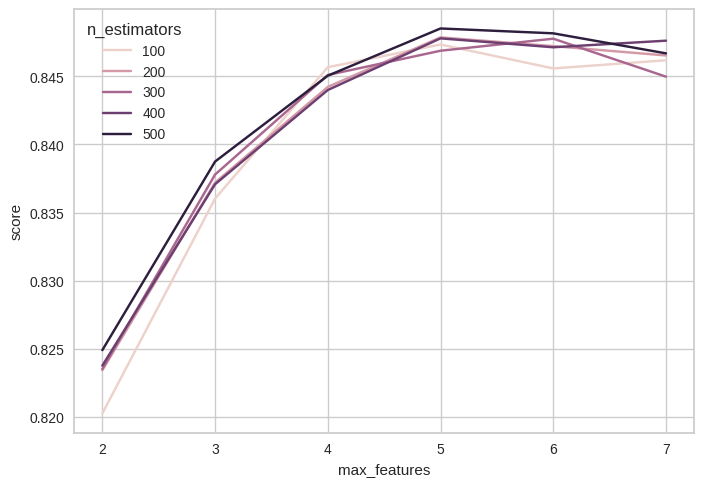

In [21]:
# Gráficar resultados
sns.lineplot(data=rf_cv, x='max_features', y='score', hue='n_estimators')

In [22]:
# Imprimir los mejores hiperparámetros
rf_gs.best_estimator_

RandomForestRegressor(max_features=5, n_estimators=500)

#### Entrenar Random Forest con hiperparámetros ajustados

In [23]:
# Configurar random forest y entrenar
rf = RandomForestRegressor(max_features=6, n_estimators=300)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=6, n_estimators=300)

#### Validar Random Forest

In [24]:
# Generar predicción
y_pred_rf = rf.predict(X_test)

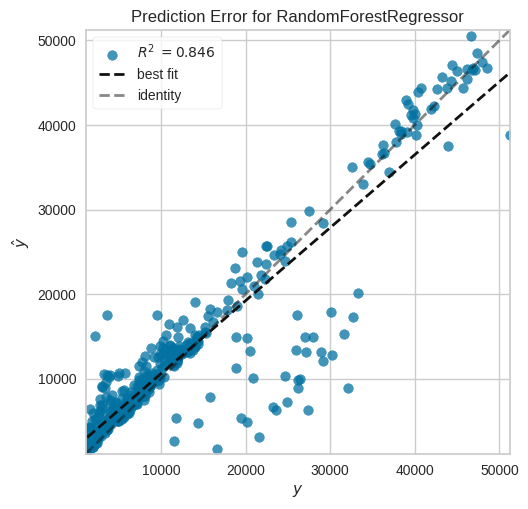

In [25]:
# Analizar predicciones vs valores reales
visualizer = prediction_error(RandomForestRegressor(max_features=6, n_estimators=300), X_train, y_train, X_test, y_test)

In [26]:
# Métricas

# MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)

# RMSE
rmse_rf = np.sqrt(mse_rf)

# MAPE
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f'MSE Random Forest = {mse_rf}')
print(f'RMSE Random Forest = {rmse_rf}')
print(f'MAPE Random Forest = {mape_rf}')

MSE Random Forest = 22637403.164528113
RMSE Random Forest = 4757.878010681665
MAPE Random Forest = 0.3441989795551277


### Gradient Boosting Machine

#### Ajuste de hiperparámetros

Vamos a realizar un ajuste de hiperparametros con:

- Número de árboles: [100, 200, 300, 400, 500]
- Tasa de aprendizaje $\lambda$: learning_rates = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5]

In [27]:
# Parametros del Gradient Boosting
GradientBoostingRegressor._get_param_names()

['alpha',
 'ccp_alpha',
 'criterion',
 'init',
 'learning_rate',
 'loss',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_iter_no_change',
 'random_state',
 'subsample',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

In [28]:
# Se crea un diccionario con el rango para cada hiperparámetro
gbm_param_grid = {
    'n_estimators':[100, 200, 300, 400, 500], # Número de árboles
    'learning_rate':[0.01, 0.03, 0.05, 0.1, 0.3, 0.5] # Número de variables en cada ramificación
}

In [29]:
# Se realiza la busqueda
gbm_gs = GridSearchCV(estimator=GradientBoostingRegressor(max_features='sqrt', max_depth=4), param_grid=gbm_param_grid, n_jobs=-1)
gbm_gs.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(max_depth=4,
                                                 max_features='sqrt'),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [30]:
# Resultados del Ajuste de Hiperparámetros
gbm_cv = pd.DataFrame(gbm_gs.cv_results_['params'])
gbm_cv['score'] = gbm_gs.cv_results_['mean_test_score']
gbm_cv

,learning_rate,n_estimators,score
0,0.01,100,0.676475
1,0.01,200,0.816193
2,0.01,300,0.845424
3,0.01,400,0.853099
4,0.01,500,0.855298
5,0.03,100,0.844358
6,0.03,200,0.855084
7,0.03,300,0.851429
8,0.03,400,0.849573
9,0.03,500,0.846669


<Axes: xlabel='learning_rate', ylabel='score'>

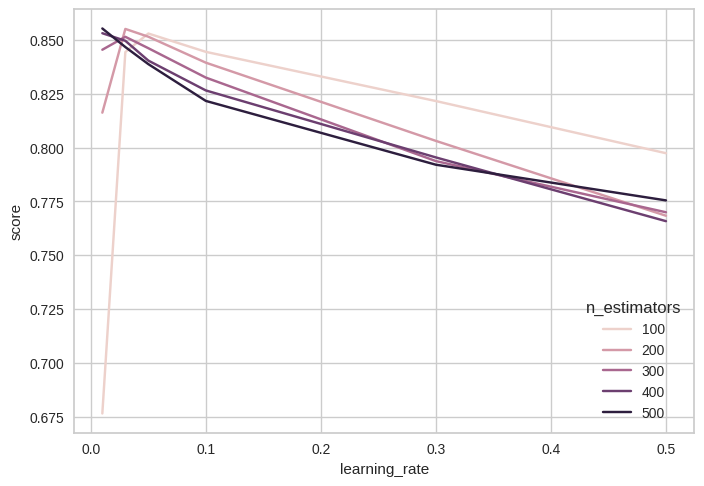

In [31]:
# Gráficar resultados
sns.lineplot(data=gbm_cv, x='learning_rate', y='score', hue='n_estimators')

In [32]:
# Imprimir los mejores hiperparámetros
gbm_gs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='sqrt',
                          n_estimators=500)

#### Entrenar Gradient Boosting con hiperparámetros ajustados

In [33]:
# Configurar gradient boosting y entrenar
gbm = GradientBoostingRegressor(learning_rate=0.03, max_features='sqrt', n_estimators=300)
gbm.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.03, max_features='sqrt',
                          n_estimators=300)

#### Validar Gradient Boosting Machine

In [34]:
# Generar predicción
y_pred_gbm = gbm.predict(X_test)

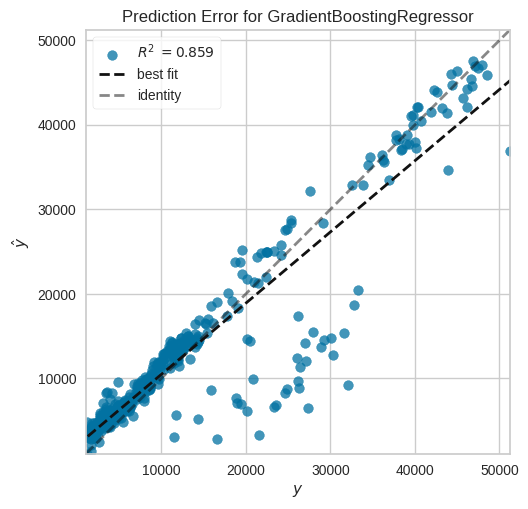

In [35]:
# Analizar predicciones vs valores reales
visualizer = prediction_error(GradientBoostingRegressor(learning_rate=0.03, max_features='sqrt', n_estimators=300), X_train, y_train, X_test, y_test)

In [36]:
# Métricas

# MSE
mse_gbm = mean_squared_error(y_test, y_pred_gbm)

# RMSE
rmse_gbm = np.sqrt(mse_rf)

# MAPE
mape_gbm = mean_absolute_percentage_error(y_test, y_pred_gbm)

print(f'MSE Gradient Boosting Machine = {mse_gbm}')
print(f'RMSE Gradient Boosting Machine = {rmse_gbm}')
print(f'MAPE Gradient Boosting Machine = {mape_gbm}')

MSE Gradient Boosting Machine = 20788341.096845213
RMSE Gradient Boosting Machine = 4757.878010681665
MAPE Gradient Boosting Machine = 0.32560834080715806


### Comparación de modelos

In [37]:
# Crear tabla de resumen con resultados de los modelos
comparacion_modelos = pd.DataFrame({
    'Modelos' : ['Regresión Lineal','Arboles','Random Forest', 'Gradient Boosting Machine'],
    'RMSE' : [rmse_reg_lin, rmse_dt, rmse_rf, rmse_gbm],
    'MAPE' : [mape_reg_lin, mape_dt, mape_rf, mape_gbm]
})
comparacion_modelos

,Modelos,RMSE,MAPE
0,Regresión Lineal,6026.029076,0.459711
1,Arboles,4678.188114,0.354267
2,Random Forest,4757.878011,0.344199
3,Gradient Boosting Machine,4757.878011,0.325608


<Axes: ylabel='Modelos'>

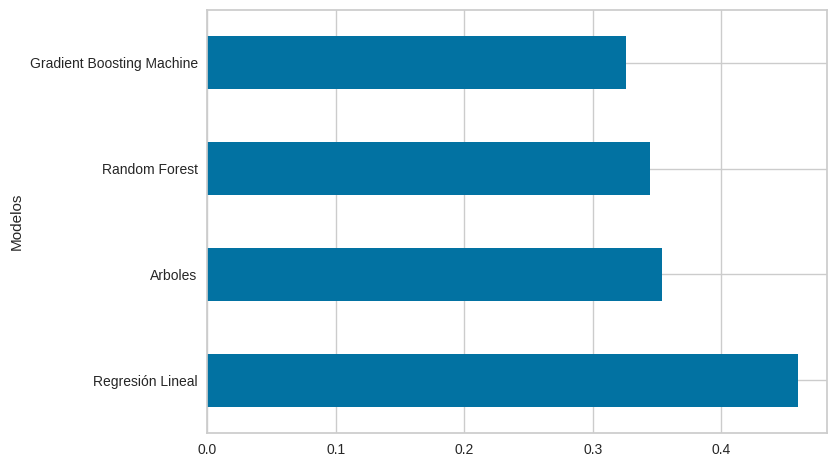

In [38]:
# Gráficar la comparación entre modelos
comparacion_modelos.set_index('Modelos').sort_values(by='MAPE', ascending=False)['MAPE'].plot.barh()

## Caso. Incumplimiento en pago de tarjeta de crédito

**Contexto:** Este conjunto de datos contiene información de sobre incumplimientos de pagos en creditos, y entrega información de los clientes de acuerdo a factores demográficos, datos crediticios, historial de pagos y estados de cuenta de tarjetas de crédito.

**Objetivo:** Entrenar un clasificador basado en métodos de ensamble predecir con gran efectividad la probabilidad de incumplimiento de crédito en un cliente.

In [39]:
datos_credito = pd.read_csv("incumplimiento_credito.csv")
datos_credito.head()

,saldo_cuenta(millones),duracion_prestamo_meses,historial_crediticio,proposito,monto(millones),saldo_ahorros(millones),antiguedad_empleo,tasa_cuotas,estado_personal,otros_deudores,historial_residencia,propiedad,edad,plan_cuotas,vivienda,creditos_existentes,trabajo,dependientes,telefono,trabajador_extranjero,incumplimiento
0,< 1M,6,crítico,radio/televisión,1169,desconocido,> 7 años,4,hombre soltero,ninguno,4,bienes raíces,67,ninguno,propia,2,empleado calificado,1,sí,sí,0
1,1M - 10M,48,pagado,radio/televisión,5951,< 1M,1 - 4 años,2,mujer,ninguno,2,bienes raíces,22,ninguno,propia,1,empleado calificado,1,ninguno,sí,1
2,desconocido,12,crítico,educación,2096,< 1M,4 - 7 años,2,hombre soltero,ninguno,3,bienes raíces,49,ninguno,propia,1,residente no calificado,2,ninguno,sí,0
3,< 1M,42,pagado,muebles,7882,< 1M,4 - 7 años,2,hombre soltero,aval,4,sociedad de ahorros y préstamos,45,ninguno,gratuita,1,empleado calificado,2,ninguno,sí,0
4,< 1M,24,retrasado,coche (nuevo),4870,< 1M,1 - 4 años,3,hombre soltero,ninguno,4,desconocido/nada,53,ninguno,gratuita,2,empleado calificado,2,ninguno,sí,1


### Preparar los datos

In [40]:
# Divida variables independientes Xs y variable dependiente y


# Cree las variables dummies


# Dividir los datos en cojunto de entrenamiento y prueba



### Regresión logística

In [41]:
# Entrenar el modelo de regresión



In [42]:
# Generar predicciones


In [43]:
# Metricas


# Imprimir metricas


### Arbol de decision

In [44]:
# Ajuste de hiperparámetros: 'max_depth' entre 1 y 26




In [45]:
# Configurar modelo de árbol

# Entrenar modelo de árbol


In [46]:
# Generar predicciones


In [47]:
# Metricas


# Imprimir metricas




### Random Forest

In [48]:
# Calcule el número de variables
# X_train.shape

In [49]:
# Variables a considerar en cada ramificación: np.sqrt(61)
# Defina un espacio alrededor de esta cantidad
# np.sqrt(61)

#### Ajuste de hiperparámetros

Vamos a realizar un ajuste de hiperparametros con:

- Número de árboles (**'n_estimators'**): [100, 200, 300, 400, 500]
- Número de variables a considerar en cada ramificación (**'max_features'**): [40,45,50,55]

In [50]:
# Se crea un diccionario con el rango para cada hiperparámetro




In [51]:
# Se realiza la busqueda



In [52]:
# Resultados del Ajuste de Hiperparámetros




In [53]:
# Gráficar resultados



In [54]:
# Imprimir los mejores hiperparámetros


#### Entrenar Random Forest con hiperparámetros ajustados

In [55]:
# Configurar random forest y entrenar


#### Validar Random Forest

In [56]:
# Generar predicciones


In [57]:
# Metricas


# Imprimir metricas


### Gradient Boosting Machine

#### Ajuste de hiperparámetros

Vamos a realizar un ajuste de hiperparametros con:

- Número de árboles: `'n_estimators':[100, 200, 300, 400, 500]`
- Tasa de aprendizaje $\lambda$: `'learning_rate' : [0.01, 0.03, 0.05, 0.1, 0.5, 1]`

In [58]:
# Se crea un diccionario con el rango para cada hiperparámetro


In [59]:
# Se realiza la busqueda


In [60]:
# Resultados del Ajuste de Hiperparámetros


In [61]:
# Gráficar resultados


In [62]:
# Imprimir los mejores hiperparámetros


#### Entrenar Gradient Boosting Machine con hiperparámetros ajustados

In [63]:
# Configurar gradient boosting y entrenar


#### Validar Gradient Boosting Machine

In [64]:
# Generar predicciones


In [65]:
# Metricas


# Imprimir metricas


### Comparación de modelos

In [66]:
# Crear tabla de resumen con resultados de los modelos


In [67]:
# Gráficar la comparación entre modelos
# comparacion_modelos.set_index('Modelos').sort_values(by='Recall', ascending=False)['Recall'].plot.barh()